<a href="https://colab.research.google.com/github/woukl22/MachineLearningStudy_PythonMachineLearning3rdEd/blob/main/Chapter3/3.3.6_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3.6 규제를 사용하여 과대적합 피하기


**과대적합(overfitting)**은 머신 러닝에서 자주 발생하는 문제이다.<br>
모델이 훈련 데이터로는 잘 동작하지만 본 적 없는 데이터(**테스트 데이터**)로는 잘 **일반화 되지 않는 현상**이다. <br>
모델이 과대적합일 때 **분산(variance)이 크다**고 말한다.<br>

**과소적합(underfitting)**일 때는 **편향(bias)이 크다**.<br>
훈련 데이터에 있는 패턴을 감지할 정도로 충분히 **모델이 복잡하지 않다**는 것을 의미한다.<br>
새로운 데이터(**테스트 데이터**)에서도 **성능이 낮다**.<br><br>

**분산:**<br>
모델을 여러 번 훈련했을 때 특정 샘플에 대한 **예측의 일관성(또는 변동성)을 측정**한다.

**편향:**<br>
다른 훈련 데이터셋에서 여러 번 훈련했을 때 **예측이 정확한 값에서 얼마나 벗어났는지 측정**한다.<br><br>

좋은 **편향-분산 트레이드오프(tradeoff)**를 찾는 한 가지 방법은 **규제(regularization)**를 사용하여 **모델의 복잡도를 조정**하는 것이다.


**규제**:<br>
**과도한 파라미터**(가중치) **값**을 **제한**하기 위해 **추가적인 정보**(편향)를 **주입**하는 개념<br>
가장 널리 사용하는 규제 형태는 **L2 규제**이며, 규제 **하이퍼파라미터**는 **λ**이다.<br>
규제가 잘 동작하려면 **모든 특성이 비슷한 스케일**을 가져야 한다. (정규화가 필요함)<br><br><br>

#### - **규제 매개변수에 따른 가중치 크기의 변화**

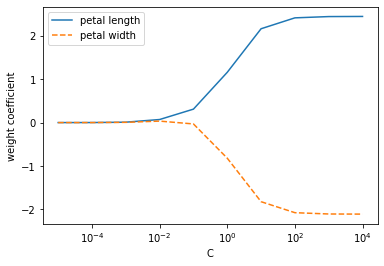

In [ ]:
# 로지스틱 회귀의 비용 함수는 규제 항을 추가해서 규제를 적용한다.
# 규제 항은 모델 훈련 과정에서 가중치를 줄이는 역할을 한다.

weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')    # 매개변수 C는 규제 하이퍼파라미터 λ의 역수이다.
  lr.fit(X_train_std, y_train)                                            # 역 규제 파라미터 C의 값을 감소시키면 규제 강도가 증가한다.
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

그래프에서 볼 수 있듯이 매개변수 **C가 감소**하면 **가중치 절댓값이 줄어든다**.<br>
즉, **규제 강도가 증가**한다.